## **CVRP Assignment 3 - part 2**

In this assignment we will explore both vision and multimodal generative AI models and their capabilities.

### **2. Text-to-Image Generation [25 pts]**

Text-to-image models based on the concept of diffusion processes has made a huge impact in this task.

We will explore the capabilities of the StableDiffusion model.

In [1]:
!pip install --no-deps bitsandbytes accelerate xformers==0.0.29 peft trl triton flash-attn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 41.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.4/336.4 kB 28.8 MB/s eta 0:00:00
  Created wheel for flash-attn: filename=flash_attn-2.7.4.post1-cp311-cp311-linux_x86_64.whl size=187831595 sha256=58853b28a5a926cae14402bfd8d4d93a45ebf8f9e79533f37ab09d0d77a99c05
  Stored in directory: /root/.cache/pip/wheels/3d/88/d8/284b89f56af7d5bf366b10d6b8e251ac8a7c7bf3f04203fb4f
Successfully built flash-attn


#### **2.1 Loading and dissecting the Stable Diffusion v2.1 Model**

The StableDiffusionv2.1 model is a relatively performant model that uses an auto-encoder coupled with a model that learns the diffusion process on the latent space.

In [2]:
import torch
from diffusers import StableDiffusionPipeline

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
dtype = torch.float16 if torch.cuda.is_available() else torch.float32
#device = torch.device("cpu")
#dtype = torch.float32

model_id = "stabilityai/stable-diffusion-2-1"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype = dtype)
pipe = pipe.to(device)

print(pipe)

    PyTorch 2.5.1+cu121 with CUDA 1201 (you have 2.6.0+cu124)
    Python  3.11.11 (you have 3.11.12)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "stabilityai/stable-diffusion-2-1",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}



#### **2.2 AutoEncoding with a Pre-trained Variational AutoEncoder [5 pts]**

Given the following image, we will use the pre-trained variational autoencoder (VAE) that comes with the StableDiffusion model to encode the image and then add random gaussian noise centered at zero with a standard deviation of 2.0 to the latent space of the VAE and then decode back the output to show its effect and how to use the VAE.

Task:

1. Add random guassian noise from $N(0, 2)$ to the latent space of the VAE

Your result should be similar to the following.

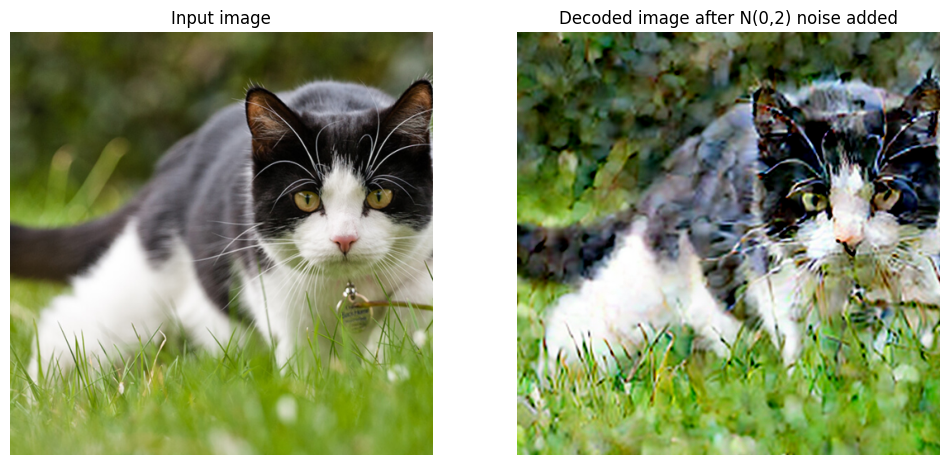

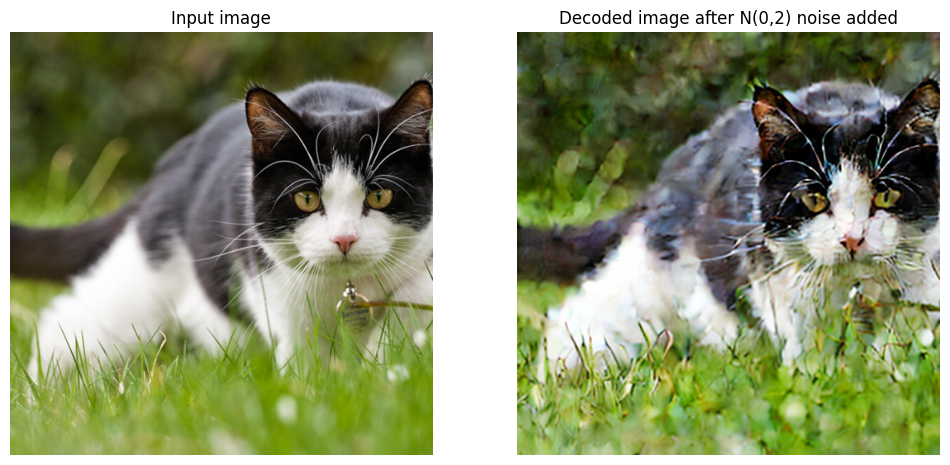

In [3]:
import io, requests
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Use a cute cat from online image
img_url = 'https://www.purina.co.uk/sites/default/files/2020-12/Understanding%20Your%20Cat%27s%20Body%20LanguageTEASER.jpg'
response = requests.get(img_url)
img_pil = Image.open(io.BytesIO(response.content))

with torch.no_grad():

  # Define the preprocessing pipeline
  transform = transforms.Compose([
      transforms.Resize(512),  # Resize the image to 256x256
      transforms.CenterCrop(512),  # Crop the image to 224x224
      transforms.ToTensor(),  # Convert the image to a PyTorch tensor
  ])

  image = transform(img_pil).to(device).to(dtype)

  #### Your code here ####

  # Normalize input image to [-1, 1] as expected by the VAE
  image_norm = (image - 0.5) * 2

  # Encode image to latent space using VAE
  posterior = pipe.vae.encode(image_norm.unsqueeze(0)).latent_dist.sample()

  # Add Gaussian noise N(0, 2)
  noise = torch.randn_like(posterior) * 2.0
  noisy_latents = posterior + noise

  # Decode noisy latent space
  decoded = pipe.vae.decode(noisy_latents).sample

  # Denormalize output image back to [0, 1]
  output = (decoded.squeeze(0).clamp(-1, 1) + 1) / 2


  ########################

  # Plot side by side.
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.title("Input image")
  plt.imshow(image.data.permute(1, 2, 0).float().cpu()); plt.axis("off")
  plt.subplot(1, 2, 2)
  plt.title("Decoded image after N(0,2) noise added")
  output = output.clip(0, 1)
  plt.imshow(output.data.permute(1, 2, 0).float().cpu()); plt.axis("off")
  plt.show()

#### **2.4 Generating an image [5 pts]**

Next we generate a sample image by passing a prompt through the pipeline. The diffusion model starts from a noisy image and then tries to progressively a) Remove noise and b) Maximize the alignment of the output image with the input text prompt. The denoising process happens in the latent space so the latent representation must be further decoded into an image with an image-only pre-trained variational autoencoder (VAE).

Task:

1. Complete the `callback` function to decode for every timesteps.

Your output should be similar to following image.

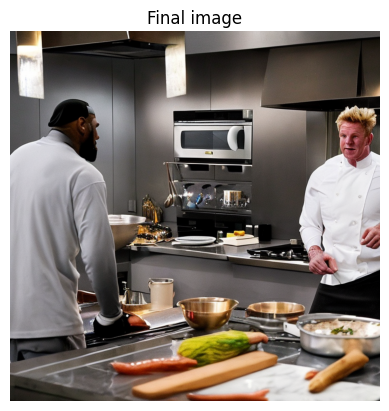

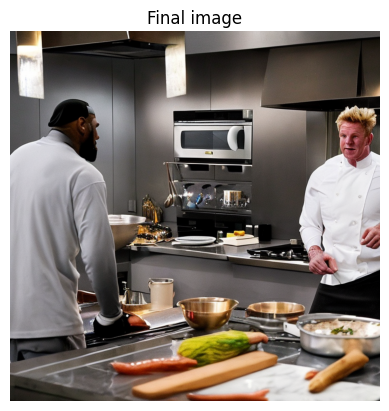

In [4]:
import torchvision, time
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

prompt = "Lebron James is cooking in a kitchen with Gordon Ramsay staring at him"

def callback(pipe, step, timestep, data):
  if step % 5 == 0:
    # we plot out the image for every 5 timesteps
    #### Your code here ####
    # Decode latent image
    latents = data["latents"]
    latents = latents / 0.18215
    image = pipe.vae.decode(latents).sample
    image = (image.clamp(-1, 1) + 1) / 2
    image = image.detach().cpu().permute(0, 2, 3, 1).numpy()

    # Show intermediate image
    clear_output(wait = True)
    plt.figure(); plt.title("Iteration %d" % step)
    plt.imshow(image[0]); plt.axis('off'); plt.show()
  return data



images = pipe(prompt = prompt,
              num_inference_steps = 50,
              generator = torch.Generator(device).manual_seed(123),
              guidance_scale = 7.5,
              callback_on_step_end = callback).images

#     ########################

clear_output(wait = True)
plt.figure(); plt.title("Final image");
plt.imshow(images[0]);plt.axis('off'); plt.show();
images[0].save("scene.jpg")

#### **2.5 Analyzing and dissecting the model [5 pts]**

The StableDiffusion-v2.1 model has several components that it depends on. Answer the following general questions:


1. What was the native image output size that was used to train this model?

Ans:
___Stable Diffusion v2.1 was trained primarily on images of resolution 512x512.

2. What is the shape of the latent space use by this model for native resolution input?

Ans:
___Latent space shape: (4, 64, 64)

The VAE (Variational Autoencoder) compresses a 512x512 image into a latent representation that is 1/8th the spatial resolution:

512
÷
8
=
64
512÷8=64

Latent channels = 4. So: (batch_size, 4, 64, 64)


3. What is the size of the vocabulary used to represent the input text?

Ans:___49,408 tokens.
4. What is the maximum token-length of the sequence that the text encoder can encode?

Ans:___The OpenCLIP text encoder used in SD v2.1 can process up to 77 tokens per prompt. If input is longer, it's truncated; if shorter, it's padded.

**Note:** None of the answers depend on the example provided in the previous cell or any particular input except when indicated in the question.

#### **2.6 Analyzing and dissecting other models [5 pts]**

The StableDiffusion-v2.1 model is good but it is far from the state-of-the-art today. You can find it in the leaderboard here: https://artificialanalysis.ai/text-to-image/arena?tab=Leaderboard. Answer the same questions as in Section 2.5 for the top 4 models in this leaderboard for which this information is possible to obtain, i.e. there is either a technical report publicly available providing these details or the model is open source and you can inspect it. Fill the table below using the markup and format provided.

| Model Name| Training Image Size | Shape of Latent Space | Vocabulary Size | Text Length |
|----------|----------|----------|----------| ----------|
| Gpt-4o | 	256×256 (typical) | Sequence of visual tokens ( 16×16 grid of tokens) | ~32,000 (BPE) | 128,000 tokens|
| Imagen 3 | 1024*1024 | Not disclosed | Not disclosed |480 |
| HiDream-I1-Dev | 	1024*1024 | 128* 128 *4 | 	49,152 |	77 |
| Recraft V3 | Not publicly disclosed | Not publicly disclosed | Not publicly disclosed |Capable of handling long texts within images |
| StableDiffusionv2.1 | 512×512 pixels |	64×64×4 | 49,408 | Up to 77 tokens|

#### **2.7 Generate an image [5 pts]**

Tasks:

1. Try to generate an image such as the one shown below. To get full points there should be: 1) a capybara, 2) the capybara has to be wearing a hat and a bowtie 3) the capybara has to be in front of a brick wall, 4) the aesthetic quality of the output should be preserved.

2. You must include your generated image and compute the CLIPScore (using your prompt) and Quality score for your image.

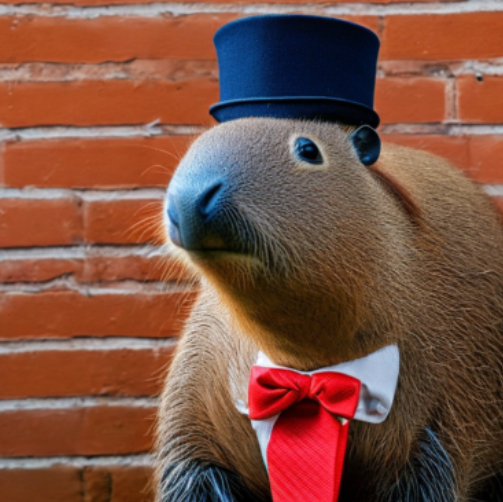

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

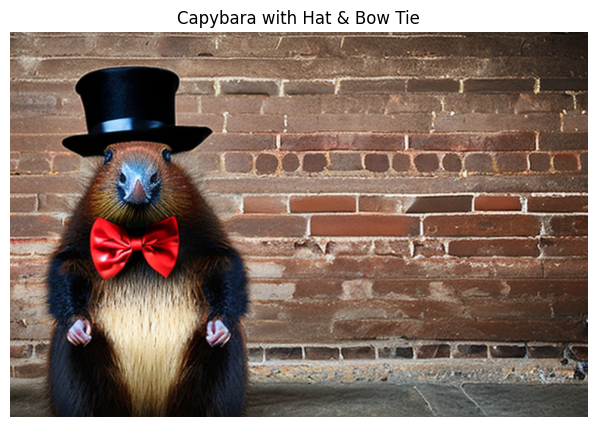

CLIPScore: 0.3870
QualityScore (Laplacian var): 633.39


In [19]:
##Your code here
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
from diffusers import StableDiffusionPipeline
from transformers import CLIPProcessor, CLIPModel

# 1) Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dtype  = torch.float16 if device.type=="cuda" else torch.float32

pipe = StableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1",
    torch_dtype=dtype,
).to(device)

# 2) Prompt with full‑body + centered instructions
prompt = (
    "A full-body, photorealistic capybara brown in colour centered in frame, "
    "wearing a tall black top hat and a bright red bow tie around its neck, "
    "standing in front of a brick wall, ultra-high resolution, "
    "studio lighting, sharp focus"
)

negative_prompt = "cropped, cut-off, partial body, cartoonish"

# 3) Generate with a rectangular canvas and stronger guidance
with torch.autocast(device.type):
    images = pipe(
        prompt=prompt,
        negative_prompt=negative_prompt,
        height=512,                # make wider than tall
        width=768,
        num_inference_steps=50,
        guidance_scale=10.0,       # bump up to really stick to bow tie
        generator=torch.Generator(device).manual_seed(123),
    ).images

# 4) Show & save
plt.figure(figsize=(8,5))
plt.title("Capybara with Hat & Bow Tie")
plt.axis("off")
plt.imshow(images[0])
plt.show()
images[0].save("capybara_fullbody.jpg")

# 5) Compute CLIPScore
clip_model     = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

inputs = clip_processor(
    text=[prompt],
    images=[images[0]],
    return_tensors="pt",
    padding=True
).to(device)

with torch.no_grad():
    img_emb = clip_model.get_image_features(pixel_values=inputs["pixel_values"])
    txt_emb = clip_model.get_text_features(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"]
    )

img_emb = img_emb / img_emb.norm(dim=-1, keepdim=True)
txt_emb = txt_emb / txt_emb.norm(dim=-1, keepdim=True)
clip_score = (img_emb * txt_emb).sum().item()
print(f"CLIPScore: {clip_score:.4f}")

# 6) Compute QualityScore (sharpness via Laplacian variance)
img_np = np.array(images[0])
gray   = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
quality_score = cv2.Laplacian(gray, cv2.CV_64F).var()
print(f"QualityScore (Laplacian var): {quality_score:.2f}")


## Note: Always stop your instance runtime to avoid running out of quotas:

In [1]:
from google.colab import runtime
runtime.unassign()